![dsia](https://static1.squarespace.com/static/5c4631190dbda3abea29db4c/t/5c465b0dc74c5024875652f7/1549343891985/?format=1500w)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
# get matplot to show charts inline
%matplotlib inline

chrome://settings/content/cookies

NOTE: Make sure third party cookies are not blocked.

In [2]:
#from google.colab import files
#uploaded = files.upload()
#import io
df = pd.read_csv("MFG10YearTerminationData.csv")


In [13]:
df.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


In [14]:
df.tail()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
49648,8258,12/1/2015 0:00,5/28/1994,8/19/2013,12/30/2015,21,2,Valemount,Dairy,Dairy Person,34,M,Male,Layoff,Involuntary,2015,TERMINATED,STORES
49649,8264,8/1/2013 0:00,6/13/1994,8/27/2013,8/30/2013,19,0,Vancouver,Customer Service,Cashier,44,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES
49650,8279,12/1/2015 0:00,7/18/1994,9/15/2013,12/30/2015,21,2,White Rock,Customer Service,Cashier,39,F,Female,Layoff,Involuntary,2015,TERMINATED,STORES
49651,8296,12/1/2013 0:00,9/2/1994,10/9/2013,12/31/2013,19,0,Kelowna,Customer Service,Cashier,16,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES
49652,8321,12/1/2014 0:00,11/28/1994,11/24/2013,12/30/2014,20,1,Grand Forks,Customer Service,Cashier,13,F,Female,Layoff,Involuntary,2014,TERMINATED,STORES


# Accessing the main DataFrame components

In [15]:
columns = df.columns
index = df.index
data = df.values

In [16]:
columns

Index(['EmployeeID', 'recorddate_key', 'birthdate_key', 'orighiredate_key',
       'terminationdate_key', 'age', 'length_of_service', 'city_name',
       'department_name', 'job_title', 'store_name', 'gender_short',
       'gender_full', 'termreason_desc', 'termtype_desc', 'STATUS_YEAR',
       'STATUS', 'BUSINESS_UNIT'],
      dtype='object')

In [17]:
index

RangeIndex(start=0, stop=49653, step=1)

In [0]:
data

array([[1318, '12/31/2006 0:00', '1/3/1954', ..., 2006, 'ACTIVE',
        'HEADOFFICE'],
       [1318, '12/31/2007 0:00', '1/3/1954', ..., 2007, 'ACTIVE',
        'HEADOFFICE'],
       [1318, '12/31/2008 0:00', '1/3/1954', ..., 2008, 'ACTIVE',
        'HEADOFFICE'],
       ...,
       [8279, '12/1/2015 0:00', '7/18/1994', ..., 2015, 'TERMINATED',
        'STORES'],
       [8296, '12/1/2013 0:00', '9/2/1994', ..., 2013, 'TERMINATED',
        'STORES'],
       [8321, '12/1/2014 0:00', '11/28/1994', ..., 2014, 'TERMINATED',
        'STORES']], dtype=object)

# 1. Understanding Data Types

#### 1.A Find Shape of Data Frame

In [19]:
# A:
df.shape

(49653, 18)

#### 1.B Find Data Tyeps of Data Frame

In [26]:
# A:
df.dtypes.value_counts()

object    13
int64      5
dtype: int64

#### 1.C Find Number of Data Types in a Data Frame



```
Expected Output:
int64      5
object    13
dtype: int64
```



#### 1.D Use Info

Use info and explore difference.

In [28]:
# A:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49653 entries, 0 to 49652
Data columns (total 18 columns):
EmployeeID             49653 non-null int64
recorddate_key         49653 non-null object
birthdate_key          49653 non-null object
orighiredate_key       49653 non-null object
terminationdate_key    49653 non-null object
age                    49653 non-null int64
length_of_service      49653 non-null int64
city_name              49653 non-null object
department_name        49653 non-null object
job_title              49653 non-null object
store_name             49653 non-null int64
gender_short           49653 non-null object
gender_full            49653 non-null object
termreason_desc        49653 non-null object
termtype_desc          49653 non-null object
STATUS_YEAR            49653 non-null int64
STATUS                 49653 non-null object
BUSINESS_UNIT          49653 non-null object
dtypes: int64(5), object(13)
memory usage: 6.8+ MB


# 2. Selecting Column in Data Frame

#### 2.A Check Values of Job_Title column

In [44]:
# A:
df['job_title']

#df.loc[df['job_title'] == 'CEO']

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE
5,1318,12/31/2011 0:00,1/3/1954,8/28/1989,1/1/1900,57,22,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2011,ACTIVE,HEADOFFICE
6,1318,12/31/2012 0:00,1/3/1954,8/28/1989,1/1/1900,58,23,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2012,ACTIVE,HEADOFFICE
7,1318,12/31/2013 0:00,1/3/1954,8/28/1989,1/1/1900,59,24,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2013,ACTIVE,HEADOFFICE
8,1318,12/31/2014 0:00,1/3/1954,8/28/1989,1/1/1900,60,25,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2014,ACTIVE,HEADOFFICE
9,1318,12/31/2015 0:00,1/3/1954,8/28/1989,1/1/1900,61,26,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE


#### 2.B Find How Many Rows Are in Each Job Title



```
# Expected Output
Meat Cutter                        9984
Dairy Person                       8590
Produce Clerk                      8237
.
.
.
```



In [45]:
df['job_title'].value_counts()

Meat Cutter                        9984
Dairy Person                       8590
Produce Clerk                      8237
Baker                              8096
Cashier                            6816
Shelf Stocker                      5622
Customer Service Manager            306
Processed Foods Manager             289
Meats Manager                       285
Bakery Manager                      285
Produce Manager                     278
Store Manager                       271
Recruiter                            62
HRIS Analyst                         55
Accounting Clerk                     50
Benefits Admin                       35
Labor Relations Analyst              30
Accounts Receiveable Clerk           30
Trainer                              26
Accounts Payable Clerk               25
Investment Analyst                   20
Compensation Analyst                 20
Systems Analyst                      20
Auditor                              20
Corporate Lawyer                     17


In [55]:
# A:
def row_count(data_frame):
    number_of_rows = len(df.index)
    return number_of_rows
    
#row_count(df)

49653

#### 2.C [BONUS] Write A Function to Row Count



```
def row_count(column_name):
    number_of_rows = 0
    return number_of_rows
```



#### 2.D Describe 'Age'

Find count,  mean,  std, min, max of column 'age'

In [64]:
# A:
#df['age']
df['age'].describe()

count    49653.000000
mean        42.077035
std         12.427257
min         19.000000
25%         31.000000
50%         42.000000
75%         53.000000
max         65.000000
Name: age, dtype: float64

##### 2.E [BONUS] Describe 'All Numeric Columns of Data Frame

Find count, mean, std, min, max of of all columns of dataframe

In [66]:
# A:
df.describe(include='all')

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
count,49653.000000,49653,49653,49653,49653,49653.000000,49653.000000,49653,49653,49653,49653.000000,49653,49653,49653,49653,49653.000000,49653,49653
unique,NaN,130,5342,4415,1055,NaN,NaN,40,21,47,NaN,2,2,4,3,NaN,2,2
top,NaN,12/31/2013 0:00,3/23/1973,2/26/2006,1/1/1900,NaN,NaN,Vancouver,Meats,Meat Cutter,NaN,F,Female,Not Applicable,Not Applicable,NaN,ACTIVE,STORES
freq,NaN,5215,40,50,42450,NaN,NaN,11211,10269,9984,NaN,25898,25898,48168,48168,NaN,48168,49068
mean,4859.495740,NaN,NaN,NaN,NaN,42.077035,10.434596,NaN,NaN,NaN,27.297605,NaN,NaN,NaN,NaN,2010.612612,NaN,NaN
std,1826.571142,NaN,NaN,NaN,NaN,12.427257,6.325286,NaN,NaN,NaN,13.514134,NaN,NaN,NaN,NaN,2.845577,NaN,NaN
min,1318.000000,NaN,NaN,NaN,NaN,19.000000,0.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,2006.000000,NaN,NaN
25%,3360.000000,NaN,NaN,NaN,NaN,31.000000,5.000000,NaN,NaN,NaN,16.000000,NaN,NaN,NaN,NaN,2008.000000,NaN,NaN
50%,5031.000000,NaN,NaN,NaN,NaN,42.000000,10.000000,NaN,NaN,NaN,28.000000,NaN,NaN,NaN,NaN,2011.000000,NaN,NaN
75%,6335.000000,NaN,NaN,NaN,NaN,53.000000,15.000000,NaN,NaN,NaN,42.000000,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN


# 3. Making The Index Meaningful

In [0]:
# A:

#### 3.A Find A Specifc Row Using Index

In [85]:
# A:
df.iloc[124]

EmployeeID                                1334
recorddate_key                 12/31/2010 0:00
birthdate_key                         2/6/1961
orighiredate_key                     9/15/1989
terminationdate_key                   1/1/1900
age                                         49
length_of_service                           21
city_name                            Vancouver
department_name                      Executive
job_title              Exec Assistant, Finance
store_name                                  35
gender_short                                 M
gender_full                               Male
termreason_desc                 Not Applicable
termtype_desc                   Not Applicable
STATUS_YEAR                               2010
STATUS                                  ACTIVE
BUSINESS_UNIT                       HEADOFFICE
Name: 124, dtype: object

#### 3.B Sort Data Frame using Index

In [89]:
# A:
df.sort_index()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE
5,1318,12/31/2011 0:00,1/3/1954,8/28/1989,1/1/1900,57,22,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2011,ACTIVE,HEADOFFICE
6,1318,12/31/2012 0:00,1/3/1954,8/28/1989,1/1/1900,58,23,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2012,ACTIVE,HEADOFFICE
7,1318,12/31/2013 0:00,1/3/1954,8/28/1989,1/1/1900,59,24,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2013,ACTIVE,HEADOFFICE
8,1318,12/31/2014 0:00,1/3/1954,8/28/1989,1/1/1900,60,25,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2014,ACTIVE,HEADOFFICE
9,1318,12/31/2015 0:00,1/3/1954,8/28/1989,1/1/1900,61,26,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE


#### 3.C [BONUS] Sort Data Frame using Age

In [91]:
# A:
df.sort_values(by='age')

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
48132,8325,12/31/2013 0:00,12/7/1994,11/29/2013,1/1/1900,19,0,Cranbrook,Customer Service,Cashier,8,M,Male,Not Applicable,Not Applicable,2013,ACTIVE,STORES
47925,8253,12/31/2013 0:00,5/15/1994,8/12/2013,1/1/1900,19,0,North Vancouver,Customer Service,Cashier,22,F,Female,Not Applicable,Not Applicable,2013,ACTIVE,STORES
47922,8252,12/31/2013 0:00,5/10/1994,8/9/2013,1/1/1900,19,0,Victoria,Customer Service,Cashier,46,F,Female,Not Applicable,Not Applicable,2013,ACTIVE,STORES
47919,8251,12/31/2013 0:00,5/7/1994,8/7/2013,1/1/1900,19,0,Vancouver,Customer Service,Cashier,44,F,Female,Not Applicable,Not Applicable,2013,ACTIVE,STORES
47916,8250,12/31/2013 0:00,4/26/1994,8/2/2013,1/1/1900,19,0,Burnaby,Dairy,Dairy Person,5,F,Female,Not Applicable,Not Applicable,2013,ACTIVE,STORES
47913,8249,12/31/2013 0:00,4/23/1994,7/31/2013,1/1/1900,19,0,New Westminster,Customer Service,Cashier,21,M,Male,Not Applicable,Not Applicable,2013,ACTIVE,STORES
47910,8248,12/31/2013 0:00,4/16/1994,7/27/2013,1/1/1900,19,0,Kamloops,Customer Service,Cashier,15,M,Male,Not Applicable,Not Applicable,2013,ACTIVE,STORES
47492,8088,12/31/2012 0:00,1/1/1993,11/21/2012,1/1/1900,19,0,New Westminster,Customer Service,Cashier,21,F,Female,Not Applicable,Not Applicable,2012,ACTIVE,STORES
47496,8089,12/31/2012 0:00,1/6/1993,11/23/2012,1/1/1900,19,0,Victoria,Customer Service,Cashier,46,F,Female,Not Applicable,Not Applicable,2012,ACTIVE,STORES
47907,8247,12/31/2013 0:00,4/14/1994,7/26/2013,1/1/1900,19,0,Kamloops,Customer Service,Cashier,15,F,Female,Not Applicable,Not Applicable,2013,ACTIVE,STORES


#### 3.D [BONUS] Using Sample Select Any Row 

In [93]:
# A:
df.sample()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
18204,4267,12/31/2012 0:00,10/18/1964,12/30/1997,1/1/1900,48,15,Vancouver,Bakery,Baker,42,F,Female,Not Applicable,Not Applicable,2012,ACTIVE,STORES


# 4. Query Data Frame

#### 4.A Find Rows Where Job_Title is CEO

In [99]:
# A:
df.set_index('job_title', inplace=True)
df.loc['CEO']

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
job_title,,,,,,,,,,,,,,,,,
CEO,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
CEO,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
CEO,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
CEO,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
CEO,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE
CEO,1318,12/31/2011 0:00,1/3/1954,8/28/1989,1/1/1900,57,22,Vancouver,Executive,35,M,Male,Not Applicable,Not Applicable,2011,ACTIVE,HEADOFFICE
CEO,1318,12/31/2012 0:00,1/3/1954,8/28/1989,1/1/1900,58,23,Vancouver,Executive,35,M,Male,Not Applicable,Not Applicable,2012,ACTIVE,HEADOFFICE
CEO,1318,12/31/2013 0:00,1/3/1954,8/28/1989,1/1/1900,59,24,Vancouver,Executive,35,M,Male,Not Applicable,Not Applicable,2013,ACTIVE,HEADOFFICE
CEO,1318,12/31/2014 0:00,1/3/1954,8/28/1989,1/1/1900,60,25,Vancouver,Executive,35,M,Male,Not Applicable,Not Applicable,2014,ACTIVE,HEADOFFICE


#### 4.B Group By Age

In [10]:
# A:
#df.head()
df.groupby(['age'], as_index=False)

# 5. Visualization

#### 5.A Plot Histogram of Age 

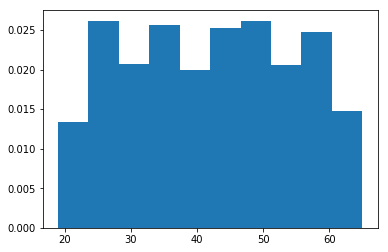

In [23]:
# A:

_ = plt.hist(df['age'], bins=15, density=True)

#### 5.B BoxPlot of Age

In [0]:
# A:


#### 5.C Scatterplot of age and length_of_service

In [0]:
# A:

#### 5.D Plot Histogram of store_name

In [0]:
# A:

#### 5.E Print Statistical Summary of Age

In [0]:
# A: